# Pandama-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'PDM'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [74]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_komplex.bef_art,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
# display(df.head())
df3 = df

In [75]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
KON/PDM          1.0
KON/PDM (?)      3.0
MBJ/PDM (?)     21.0
MDB/PDM (?)     10.0
PDM             74.0
PDM (?)        102.0
PDM/KON (?)      3.0
PDM/MBJ          3.0
PDM/MBJ (?)      6.0
PDM/MDB (?)      3.0
All            226.0
Name: objID, dtype: float64

In [76]:
a = pd.Series({'sicher':len(df.loc[~df['Typ'].str.contains("/| ")].index),
               'fraglich':len(df.loc[df['Typ'].str.contains("/| ")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,152,67.256637
sicher,74,32.743363


In [77]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot['Gew.-%'] = df_pivot['Gewicht']/df_pivot['Gewicht'].sum()*100
df_pivot

Anzahl  Gewicht  \
ort_fluss     Ort                             bef_nr                    
Likwala-Esobe Ngombe (Fpl. 283)               87/101       9     53.0   
Ngoko         Bonga (Fpl. 279)                87/101       2     41.0   
              Mbenja (Fpl. 277)               87/101       3     85.0   
              Ngama (Fpl. 281)                87/101       6    151.0   
              Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101      11    557.0   
              Pandama (Fpl. 276)              87/101      57   1783.1   
                                              87/102       3     95.0   
              Ponga (Fpl. 280)                87/101       1      8.0   
Sangha        Gatongo (Fpl. 266)              87/101       1      6.0   
              Gbagbale (Fpl. 270)             87/101       2     15.0   
              Ifondo (Fpl. 253)               87/101       3     47.0   
              Ikelemba (Fpl. 260)             87/101      14    280.0   
              Itandi (Fpl. 256)               87/101       1      9.0   
              Konda (Fpl. 268)                87/101      19    494.4   
              Leme (Fpl. 269)                 87/101       2   1349.0   
              Maboko (Fpl. 267)               87/101      11    308.0   
              Mai impembe (Fpl. 271)          87/101       5     93.0   
                                              87/102       1     13.0   
              Mandombe (Fpl. 259)             87/101      49    784.0   
              Matoto (Fpl. 264)               87/101       9    248.0   
              Molanda (Fpl. 258)              87/101      49    866.0   
              Mosanya (Fpl. 262)              87/101       2     41.0   
              Motoli (Fpl. 261)               87/101       1     18.0   
              Ouesso (Fpl. 265)               87/101      20    277.0   
                                              87/102       2     28.0   
              Pikunda (Fpl. 255)              87/1         3     22.0   
                                              87/101       6    130.0   
                                              87/2       283   1872.0   
              Sangha Fkm 428 (Fpl. 263)       87/428       1      3.0   

                                                              %     Gew.-%  
ort_fluss     Ort                             bef_nr                        
Likwala-Esobe Ngombe (Fpl. 283)               87/101   1.562500   0.547719  
Ngoko         Bonga (Fpl. 279)                87/101   0.347222   0.423707  
              Mbenja (Fpl. 277)               87/101   0.520833   0.878417  
              Ngama (Fpl. 281)                87/101   1.041667   1.560482  
              Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101   1.909722   5.756214  
              Pandama (Fpl. 276)              87/101   9.895833  18.427117  
                                              87/102   0.520833   0.981760  
              Ponga (Fpl. 280)                87/101   0.173611   0.082675  
Sangha        Gatongo (Fpl. 266)              87/101   0.173611   0.062006  
              Gbagbale (Fpl. 270)             87/101   0.347222   0.155015  
              Ifondo (Fpl. 253)               87/101   0.520833   0.485713  
              Ikelemba (Fpl. 260)             87/101   2.430556   2.893608  
              Itandi (Fpl. 256)               87/101   0.173611   0.093009  
              Konda (Fpl. 268)                87/101   3.298611   5.109285  
              Leme (Fpl. 269)                 87/101   0.347222  13.940991  
              Maboko (Fpl. 267)               87/101   1.909722   3.182969  
              Mai impembe (Fpl. 271)          87/101   0.868056   0.961091  
                                              87/102   0.173611   0.134346  
              Mandombe (Fpl. 259)             87/101   8.506944   8.102103  
              Matoto (Fpl. 264)               87/101   1.562500   2.562910  
              Molanda (Fpl. 258)              87/101   8.506944   8.949517  
              Mosan

In [78]:
len(df_pivot.index)

29

Anzahl Stücke

In [79]:
np.sum(df_pivot['Anzahl'])

576

Gewicht insgesamt in kg:

In [80]:
np.sum(df_pivot['Gewicht']) / 1000

9.6765

In [81]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['bef_art'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot['Gew.-%'] = df_pivot['Gewicht']/df_pivot['Gewicht'].sum()*100
df_pivot

,Anzahl,Gewicht,%,Gew.-%
bef_art,,,,
Grube,286,1894.0,49.652778,19.573193
Oberfl,290,7782.5,50.347222,80.426807


In [82]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_komplex.bef_art
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Komplex.bef_art) Like '%Grube%'))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = ['objID'], index = ['Ort', 'bef_nr'], aggfunc = len)
df_pivot

objID
Ort                bef_nr       
Pikunda (Fpl. 255) 87/1        3
                   87/2       60

## Fragmentierung

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


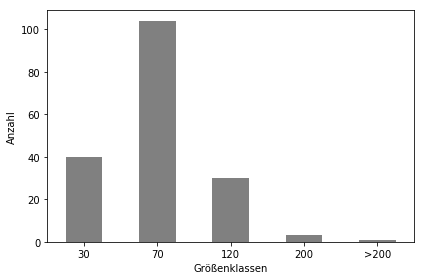

In [83]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
df_pivot = df_pivot.rename(index={500: '>200'})

df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['objID']/df_pivot['objID'].sum()*100

df_pivot['objID'].plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.tight_layout()
#plt.savefig('../output/figs/9-12_MUN87-1_KeramikFragmentierung.pdf')
plt.show()

In [84]:
df_pivot

,objID,%
Gr_Clist,,
30,40,22.471910
70,104,58.426966
120,30,16.853933
200,3,1.685393
>200,1,0.561798


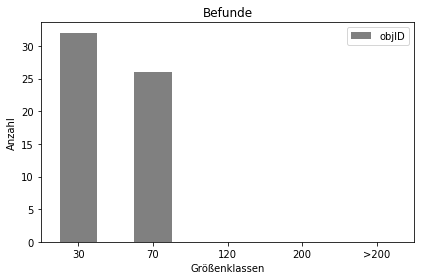

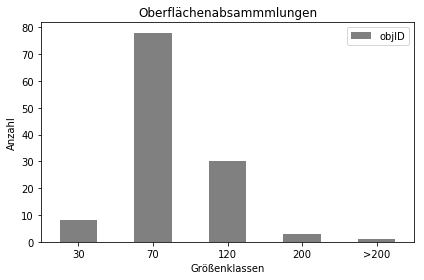

In [85]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Komplex.bef_art) Like '%Grube%'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)

df_pivot1 = df1.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
custom_dict = {30:30, 70:70, 120:120, 200:200, 500:500}
df_pivot1 = pd.DataFrame(df_pivot1, index=sorted(custom_dict, key=custom_dict.get))
df_pivot1 = df_pivot1.rename(index={500: '>200'})

sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Gr_Clist) != '')
           AND ((t_Komplex.bef_art) Not Like '%Grube%'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)

df_pivot2 = df2.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
# custom_dict = {30:30, 70:70, 120:120, 200:200, 500:500}
df_pivot2 = pd.DataFrame(df_pivot2, index=sorted(custom_dict, key=custom_dict.get))
df_pivot2 = df_pivot2.rename(index={500: '>200'})

df_pivot1.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.title('Befunde')
plt.tight_layout()

df_pivot2.plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.title('Oberflächenabsammmlungen')
plt.tight_layout()

# plt.savefig('output/figs/2.2 Funde – Herkunft Flusslauf 1.pdf')
plt.show()

## Scherbentypen

In [86]:
df_pivot = df3.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,3.0,0.520833
R,107.0,18.576389
W,466.0,80.902778
B,0.0,0.000000


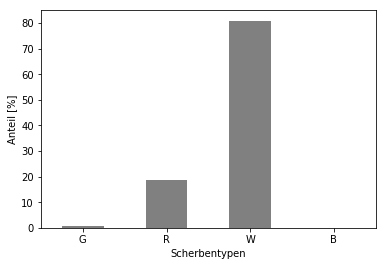

In [87]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [151]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [152]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


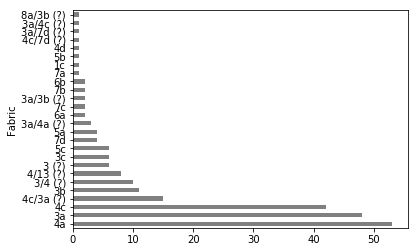

In [153]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [154]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
4a,53,22.649573
3a,48,20.512821
4c,42,17.948718
4c/3a (?),15,6.410256
3b,11,4.700855


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


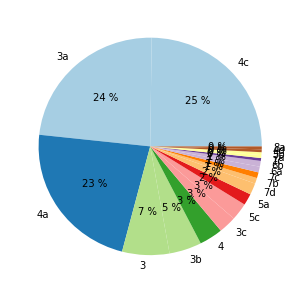

In [155]:
df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])\

a = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
a = pd.DataFrame(a)
a = a.sort_index(by=['Anzahl'], ascending=[False])

fig = plt.figure()
fig.set_size_inches(5, 5)
a['Anzahl'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [156]:
a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,1,0.427350
2,0,0.000000
3,88,37.606838
4,120,51.282051
5,11,4.700855
6,4,1.709402
7,9,3.846154
8,1,0.427350
9,0,0.000000


In [157]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,NaN,NaN
wenig,7.0,6.086957
mittel,19.0,16.521739
viel,59.0,51.304348
sehr viel,30.0,26.086957


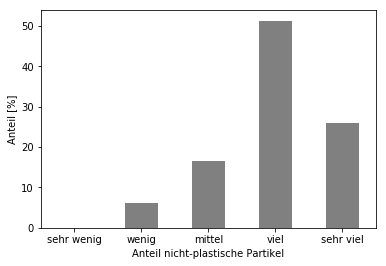

In [93]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [94]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,NaN,NaN
F,NaN,NaN
M,30.0,26.315789
C,64.0,56.140351
VC,20.0,17.543860


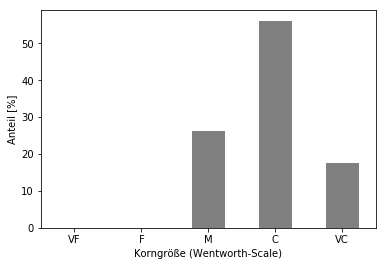

In [95]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [96]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,101,87.826087
S/Laterit,5,4.347826
S/Org,3,2.608696
Laterit,2,1.739130
S/Gl,1,0.869565
S/Laterit?,1,0.869565
S/Org/Laterit,1,0.869565
S/Org/Schamott?,1,0.869565


### Brennfarbe

In [97]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,35,20.114943
Sonstig,99,56.896552
Weiß,40,22.988506


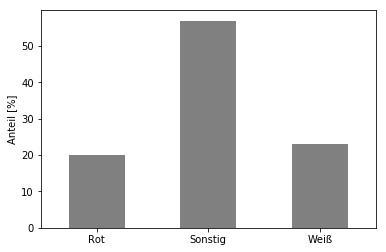

In [98]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [99]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

         128
g        101
bg        66
s         50
          32
br        19
bg bg     13
g g        6
 bg        6
g bg       5
dtype: int64

### Oberfläche der Scherben

In [100]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt/innen rau,1,0.819672
glatt,48,39.344262
glatt/leicht rau,2,1.639344
leicht rau,57,46.721311
leicht rau/sandig,1,0.819672
rau,13,10.655738


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


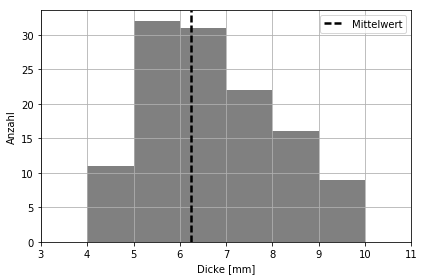

In [101]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [102]:
df['Wandung'].describe()

count    121.000000
mean       6.247934
std        1.462196
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: Wandung, dtype: float64

In [103]:
np.var(df['Wandung'])

2.120346970835326

## Gefäßformen

In [104]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [105]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [106]:
df_pivot['objID'].sum()

113

In [107]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,52,46.017699
sicher,61,53.982301


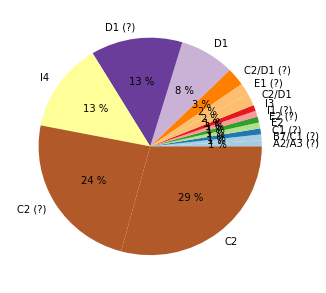

In [108]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


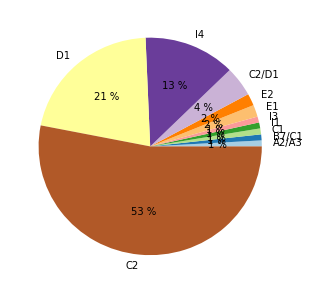

In [109]:
# löschen der (?)
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [110]:
len(df_pivot['objID'])    # Anzahl sicherer Gefäßformen

11

In [163]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [164]:
a = df.loc[df['Form_Gef'].str.contains("C2")] 
b = df.loc[~df['Form_Gef'].str.contains("I4")] 

In [165]:
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,17.000000,2.000000,40.000000,3.000000,46.000000,3.000000,0.0,2.000000,17.000000,46.0
mean,21.205882,10.000000,20.437500,8.333333,24.771739,4.166667,NaN,2.136364,1.085976,1.0
std,6.346896,1.414214,5.459862,1.154701,5.867714,1.258306,NaN,0.192847,0.085153,0.0
min,10.000000,9.000000,10.500000,7.000000,13.000000,3.000000,NaN,2.000000,0.833333,1.0
25%,17.000000,9.500000,15.875000,8.000000,21.250000,3.500000,NaN,2.068182,1.066667,1.0
50%,21.000000,10.000000,20.000000,9.000000,24.500000,4.000000,NaN,2.136364,1.100000,1.0
75%,25.000000,10.500000,24.250000,9.000000,28.000000,4.750000,NaN,2.204545,1.142857,1.0
max,32.000000,11.000000,30.000000,9.000000,39.000000,5.500000,NaN,2.272727,1.214286,1.0


C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


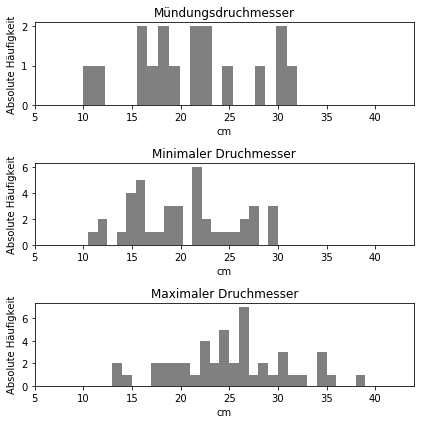

In [179]:
mi = np.min(round(a['minD'])) - 5
ma = round(max(a['maxD'])) + 5

fig = plt.figure(1)
fig.set_size_inches(6,6)

ax = plt.subplot(311)
bins = round(np.max(round(a['minD'])) - np.min(round(a['minD'])))
ax = a['muendungsD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Mündungsdruchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(312)
bins = round(np.max(a['minD']) - np.min(a['minD']))
ax = a['minD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Minimaler Druchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(313)
bins = round(np.max(a['maxD']) - np.min(a['maxD']))
ax = a['maxD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Maximaler Druchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
#plt.savefig('../output/figs/3-1-2-7_MDB_Proportionen_D1-Gef.pdf', bbox_inches='tight')
plt.show()

In [161]:
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,25.000000,4.000000,55.000000,4.000000,56.000000,4.000000,1.0,3.000000,23.000000,56.0
mean,19.080000,17.250000,18.327273,16.250000,24.312500,11.375000,0.0,1.687808,1.095446,1.0
std,7.124898,17.289207,6.388805,15.861379,5.751334,14.453229,NaN,0.788797,0.082797,0.0
min,5.000000,6.000000,4.500000,7.000000,13.000000,3.000000,0.0,0.790698,0.833333,1.0
25%,14.000000,8.250000,13.750000,8.500000,20.000000,3.750000,0.0,1.395349,1.066667,1.0
50%,18.000000,10.000000,16.500000,9.000000,24.000000,4.750000,0.0,2.000000,1.103448,1.0
75%,23.000000,19.000000,22.250000,16.750000,27.625000,12.375000,0.0,2.136364,1.155645,1.0
max,32.000000,43.000000,30.000000,40.000000,39.000000,33.000000,0.0,2.272727,1.214286,1.0


### Bauchformen

In [111]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [112]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,73,73.0
A3,14,14.0
A2,8,8.0
A1/A2,1,1.0
A1/A3,1,1.0
A1/D2,1,1.0
A3/A1,1,1.0
A3/D2,1,1.0


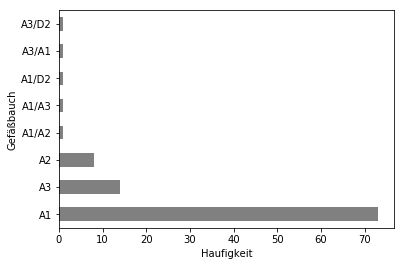

In [113]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

### Korrelation Gef-Form & Bauchform

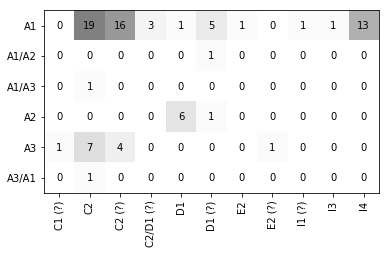

In [114]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [181]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [182]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,20,35.714286
M1,13,23.214286
M4,5,8.928571
M5/M1,4,7.142857
M3,3,5.357143
M5,3,5.357143
M2/M1,2,3.571429
M3/M4,2,3.571429
M1/M2,1,1.785714


In [183]:
len(df_pivot['objID'])    # Anzahl beobachtete Mdgformen

12

In [184]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B3,19,29.230769
B1,14,21.538462
B2,9,13.846154
B1/B3,5,7.692308
B1.1,4,6.153846


In [185]:
a = pd.Series({'B':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("B")]),
               'nicht B':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("B")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
B,55,84.615385
nicht B,10,15.384615


In [186]:
a = pd.Series({'R13':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("R13")]),
               'nicht R13':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("R13")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
R13,0,0.0
nicht R13,65,100.0


In [187]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,20,30.769231
B3,19,29.230769
B2,10,15.384615
B1.1,4,6.153846
A2.4,3,4.615385


In [188]:
df_pivot['objID'].sum()

65

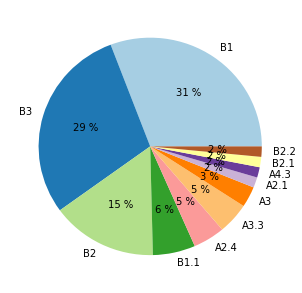

In [189]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [190]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

11

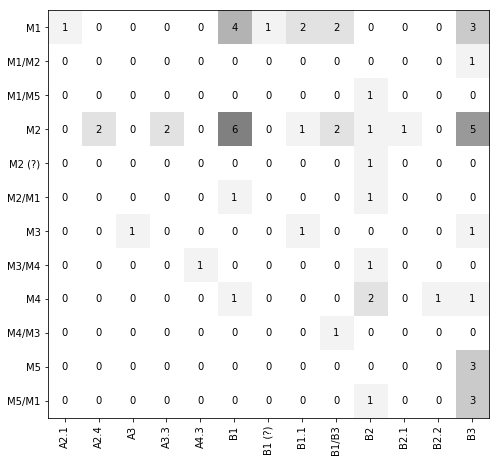

In [124]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

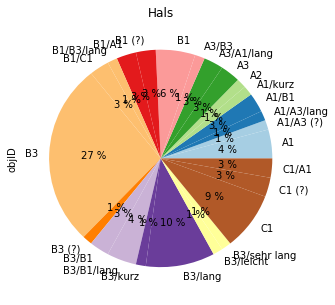

In [125]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

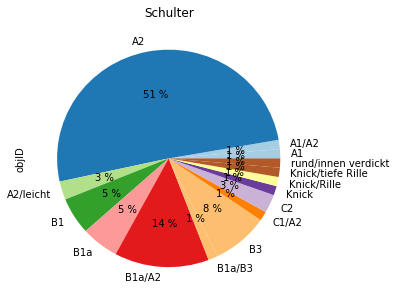

In [126]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [127]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,PDM,Pandama,1123,PDM,I4,B1
1,KON,Konda,1189,PDM,I4,B1
2,KON,Konda,1490,PDM,I4,B2
3,KON,Konda,1491,PDM,I4,B1
4,KON,Konda,2019,PDM,I4,B1
5,MDB,Mandombe,3057,PDM (?),I4,B1
6,MDB,Mandombe,4265,PDM (?),I4,B1
7,MDB,Mandombe,4267,PDM (?),I4,B1
8,MDB,Mandombe,4273,PDM (?),I4,B1
9,MAB,Maboko,4561,PDM (?),I4,B1


In [128]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
#df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Form_Boden,,
B1,9,90.0
B2,1,10.0


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


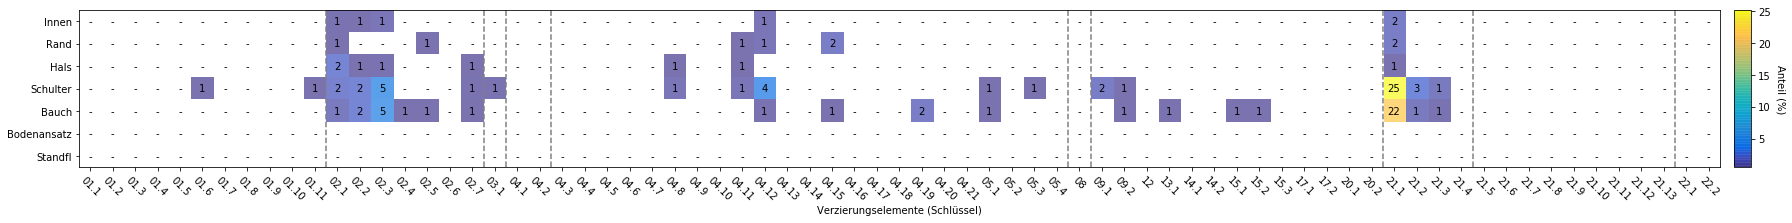

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-9_Pandama_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [131]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [132]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

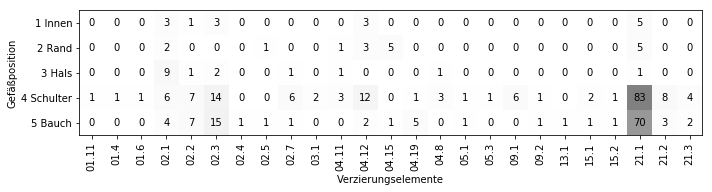

In [133]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-2-9_Pandama_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [134]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


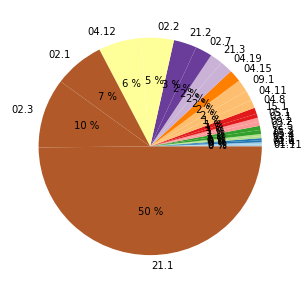

In [135]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [136]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot['Prozent'] = df_pivot["objID"]/df_pivot["objID"].sum()*100
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = False)
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
pos,,
4 Schulter,164,49.848024
5 Bauch,117,35.562310
2 Rand,17,5.167173
3 Hals,16,4.863222
1 Innen,15,4.559271


In [137]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,181,55.015198
Weitere Verzierungen,148,44.984802


In [138]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,0,0.0
vegetabilisches Roulette,181,100.0


#### Nur Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


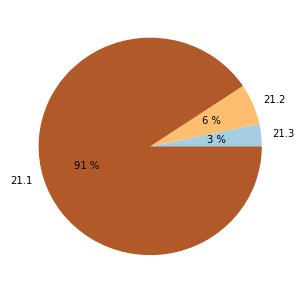

In [139]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

#### Nicht Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


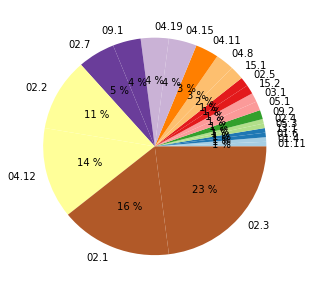

In [140]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Not Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

## Verbreitung

In [141]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
3,Ifondo (Fpl. 253),253,16.908795,0.481301,PDM (?)
12,Pikunda (Fpl. 255),255,16.635736,0.549344,PDM
5,Itandi (Fpl. 256),256,16.590471,0.697639,PDM (?)
7,Molanda (Fpl. 258),258,16.537896,0.945646,PDM
4,Mandombe (Fpl. 259),259,16.522700,1.116917,PDM
4,Ikelemba (Fpl. 260),260,16.504824,1.227166,PDM (?)
15,Motoli (Fpl. 261),261,16.467736,1.227602,PDM (?)
14,Mosanya (Fpl. 262),262,16.447391,1.213000,PDM (?)
23,Sangha Fkm 428 (Fpl. 263),263,16.443523,1.250183,PDM (?)
5,Matoto (Fpl. 264),264,16.431282,1.281643,PDM


In [142]:
df.to_csv("../data/processed/3-1-2-9_PDM_Verbreitung.csv", index = False)

In [143]:
len(df)

24

## Tafeln

In [144]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,49,1,PIK,87/2,NaN,-1:270,PDM,None,B3,None
1,49,5,PIK,87/2,NaN,-6:52,PDM (?),E2 (?),B2,None
2,55,16,PIK,87/101,NaN,32,PDM (?),C2,B3,None
3,57,21,MDB,87/101,NaN,174,PDM,D1,None,None
4,57,25,MDB,87/101,NaN,61,PDM (?),I4,A4.3,B1
5,58,3,MDB,87/101,NaN,154,PDM (?),D1,None,None
6,58,4,MDB,87/101,NaN,194,PDM,C2,B2,None
7,58,6,MDB,87/101,NaN,116,PDM (?),None,None,None
8,59,12,IKM,87/101,NaN,34,PDM (?),None,None,None
9,59,13,IKM,87/101,NaN,20,PDM (?),None,B1,None
